# Testing whether Central Limit Theorem holds true

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.neighbors import KernelDensity
%matplotlib inline

In [2]:
pima_indians_diabetes_db = pd.read_csv("diabetes.csv")

In [4]:
pima_indians_diabetes_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## We shall test the central limit theorem on the parameter Insulin

In [20]:
insulin_series = pima_indians_diabetes_db['Insulin']

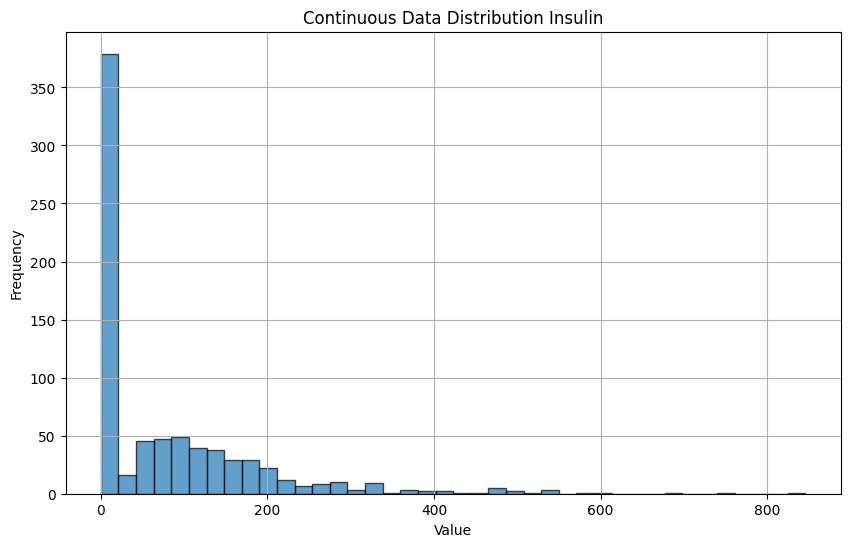

In [17]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(insulin_series, bins=40, edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Continuous Data Distribution Insulin')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## As we can see Insulin does not have a normal distribution

In [51]:
"""
We collect sample values of insulin from the dataset and calculate the mean of the samples.
sample size -> 50
total number of samples -> 100
We then plot the histogram to check what distribution the mean of the samples follow
"""
sample_mean = []
for i in range(1000): # range is 50 to collect 50 total samples
    random_values = insulin_series.sample(n=100, replace=True) # n = 100 specifies the sample size to contain 30 values
    sample_mean.append(random_values.mean())

sample_mean_insulin = pd.array(sample_mean)
sample_mean_insulin_np = np.array(sample_mean_insulin)

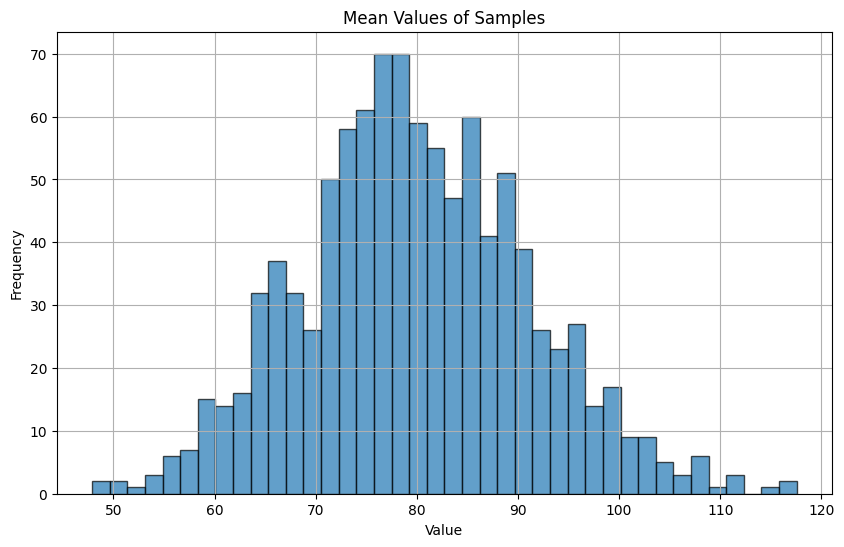

In [52]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(sample_mean_insulin, bins=40, edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Mean Values of Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

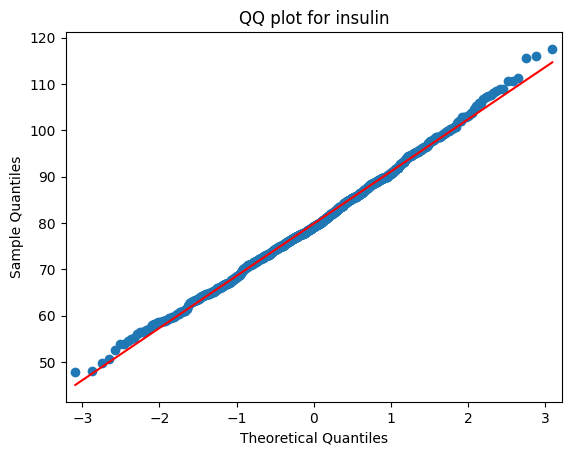

In [53]:
sm.qqplot(sample_mean_insulin, line='r')
plt.title("QQ plot for insulin")
plt.show()

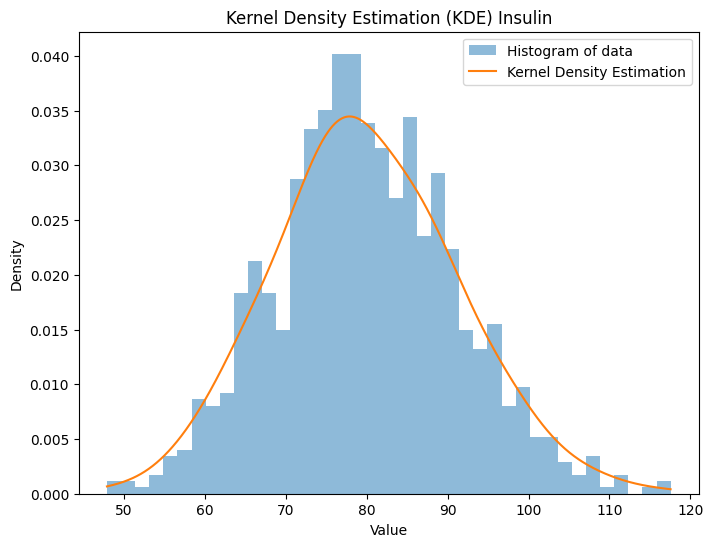

In [55]:
kde = KernelDensity(bandwidth=4, kernel='gaussian')
kde.fit(sample_mean_insulin_np[:, np.newaxis])  # sklearn expects data in 2D array format

# Generate points for plotting the KDE
x_plot = np.linspace(min(sample_mean_insulin), max(sample_mean_insulin), 1000)
log_dens = kde.score_samples(x_plot[:, np.newaxis])

# Plot the data and the KDE
plt.figure(figsize=(8, 6))
plt.hist(sample_mean_insulin, bins=40, density=True, alpha=0.5, label='Histogram of data')
plt.plot(x_plot, np.exp(log_dens), label='Kernel Density Estimation')
plt.title('Kernel Density Estimation (KDE) Insulin')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## Hence, like the central limit theorem suggests, the mean of the samples follows a normal distribution even if the distribution of the samples themselves is not a normal distribution

### Note: The more you increase the value of the sample size and the number of samples, the more the distribution of the mean of the samples follow the normal distribution